# Title: Preemptive CPU Scheduling

# Abstract:


This project focuses on the implementation of preemptive CPU Scheduling Algorithms: Round Robin, Shortest Remaining Time, and Preemptive Priority.
The CPU scheduling aspects of an Operating System kernel is also simulated here. These algorithms are ran on the simulated kernel to generate statistics about their efficiencies in terms of wait time, turnaround time, and response time. Concepts such as fairness and starvation with respect to each algorithm are explored, backing the exploration with numbers, statistics, and visualizations.


# Results:

In [1]:
import pandas as pd
import random
import copy
import matplotlib.pyplot as plt
import plotly.express as px
import operating_system
import scheduler
import process

### Testing Round Robin Algorithm

In [2]:
test_processes1 = []

# creating processes
process0 = process.Process(0, # ID
                           [5, 1, 7], # duty
                           0, # arrival time
                           30) # priority
process1 = process.Process(1, [4, 4, 2], 2, 35)
process2 = process.Process(2, [1, 6, 2], 5, 36)
process3 = process.Process(3, [6, 1, 5], 6, 20)

test_processes1.append(process0)
test_processes1.append(process1)
test_processes1.append(process2)
test_processes1.append(process3)

In [3]:
dp = operating_system.kernel(scheduler.RR_scheduler, test_processes1, "rr_test.csv", 2)

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

In [4]:
df = pd.read_csv("rr_test.csv")
df.head()

,process,Start,Finish,Priority
0,0,0,2,30
1,1,2,4,35
2,0,4,6,30
3,1,6,8,35
4,2,8,9,36


In [5]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),0,7,12
1,Process(id:1),0,2,8
2,Process(id:2),3,3,9
3,Process(id:3),3,4,16


In [6]:
print(f"RR has an average response time of {average_response_time}")
print(f"RR has an average wait time of {average_wait_time}")
print(f"RR has an average turnaround time of {average_turnaround_time}")

RR has an average response time of 1.5
RR has an average wait time of 4.0
RR has an average turnaround time of 11.25


In [7]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

### Testing Shortest Remaining Time Algorithm 

In [8]:
test_processes2 = []

# creating processes
process0 = process.Process(0, # ID
                           [5, 1, 7], # duty
                           0, # arrival time
                           30) # priority
process1 = process.Process(1, [4, 4, 2], 2, 35)
process2 = process.Process(2, [1, 6, 2], 5, 36)
process3 = process.Process(3, [6, 1, 5], 6, 20)

test_processes2.append(process0)
test_processes2.append(process1)
test_processes2.append(process2)
test_processes2.append(process3)

In [9]:
dp = operating_system.kernel(scheduler.SRT_scheduler, test_processes2, "srt_test.csv")

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

In [10]:
df = pd.read_csv("srt_test.csv")
df.head()

,process,Start,Finish,Priority
0,0,0,5,30
1,2,5,6,36
2,1,6,10,35
3,3,10,16,20


In [11]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),0,0,5
1,Process(id:1),4,4,10
2,Process(id:2),0,0,6
3,Process(id:3),4,4,16


In [12]:

print(f"SRT has an average response time of {average_response_time}")
print(f"SRT has an average wait time of {average_wait_time}")
print(f"SRT has an average turnaround time of {average_turnaround_time}")

SRT has an average response time of 2.0
SRT has an average wait time of 2.0
SRT has an average turnaround time of 9.25


In [13]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

### Testing Preemptive Priority Algorithm

In [14]:
test_processes3 = []

# creating processes
process0 = process.Process(0, # ID
                           [5, 1, 7], # duty
                           0, # arrival time
                           30) # priority
process1 = process.Process(1, [4, 4, 2], 2, 35)
process2 = process.Process(2, [1, 6, 2], 5, 36)
process3 = process.Process(3, [6, 1, 5], 6, 20)

test_processes3.append(process0)
test_processes3.append(process1)
test_processes3.append(process2)
test_processes3.append(process3)

In [15]:
dp = operating_system.kernel(scheduler.PP_scheduler, test_processes3, "pp_test.csv")

pp_response = list(dp["response time"])
pp_wait = list(dp["wait time"])
pp_turnaround = list(dp["turnaround time"])

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

In [16]:
df = pd.read_csv("pp_test.csv")
df.head()

,process,Start,Finish,Priority
0,0,0,2,30
1,1,2,5,35
2,2,5,6,36
3,1,6,7,35
4,0,7,10,30


In [17]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),0,5,10
1,Process(id:1),0,1,7
2,Process(id:2),0,0,6
3,Process(id:3),4,4,16


In [18]:
print(f"PP has an average response time of {average_response_time}")
print(f"PP has an average wait time of {average_wait_time}")
print(f"PP has an average turnaround time of {average_turnaround_time}")

PP has an average response time of 1.0
PP has an average wait time of 2.5
PP has an average turnaround time of 9.75


In [19]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

### Testing Multi-Level Feedback Queue Algorithm

In [20]:
test_processes4 = []

# creating processes
process0 = process.Process(0, # ID
                           [5, 1, 7], # duty
                           0, # arrival time
                           30) # priority
process1 = process.Process(1, [4, 4, 2], 2, 35)
process2 = process.Process(2, [1, 6, 2], 5, 36)
process3 = process.Process(3, [6, 1, 5], 6, 20)

test_processes4.append(process0)
test_processes4.append(process1)
test_processes4.append(process2)
test_processes4.append(process3)

# process0 = process.Process(0, [5, 6, 7], 0, 30)
# process1 = process.Process(1, [4, 2, 3], 3, 35)
# process2 = process.Process(2, [2, 3, 4], 4, 36)
# process3 = process.Process(3, [5, 2, 7], 7, 20)

# test_processes4 = [process1, process2, process3, process0]

In [21]:
dp = operating_system.kernel(scheduler.MFQ_scheduler, test_processes4, "mfq_test.csv", levels=[4, 7, 100])

mfq_response = list(dp["response time"])
mfq_wait = list(dp["wait time"])
mfq_turnaround = list(dp["turnaround time"])

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

In [22]:
df = pd.read_csv("mfq_test.csv")
df.head()

,process,Start,Finish,Priority
0,0,0,4,30
1,1,4,8,35
2,2,8,9,36
3,3,9,13,20
4,1,13,15,35


In [23]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),0,29,27
1,Process(id:1),2,13,15
2,Process(id:2),3,13,17
3,Process(id:3),3,22,32


In [24]:
print(f"MFQ has an average response time of {average_response_time}")
print(f"MFQ has an average wait time of {average_wait_time}")
print(f"MFQ has an average turnaround time of {average_turnaround_time}")

MFQ has an average response time of 2.0
MFQ has an average wait time of 19.25
MFQ has an average turnaround time of 22.75


In [25]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

## Comparison of the Algorithms on 1000 randomly generated processes

In [26]:
CPU_BOUND_CPU_RANGE = (8, 12) 
CPU_BOUND_IO_RANGE = (1, 3)

IO_BOUND_CPU_RANGE = (1, 3)  
IO_BOUND_IO_RANGE = (8, 12)

NUM_PROCESSES = 1000
HALF_PROCESSES = NUM_PROCESSES // 2  

processes = []

# first 50 IO-Bound processes

test_data = [
    process.Process(i, [random.randint(1, 3), random.randint(8, 12), random.randint(1, 3)], 
                    random.randint(0, 50), random.randint(20, 80)) 
    for i in range(50)
]
for i in range(50, 100):
    test_data.append(process.Process(i, [random.randint(8, 12), random.randint(1, 3), random.randint(8, 12)], 
                                     random.randint(20, 50), random.randint(20, 80)))


### Performance of Round Robin with quantum of 2

In [27]:
dp = operating_system.kernel(scheduler.RR_scheduler, copy.deepcopy(test_data), "com_test.csv", 2)

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

In [28]:
df = pd.read_csv("com_test.csv")
df.head()

,process,Start,Finish,Priority
0,25,1,3,37
1,39,3,4,39
2,22,4,6,50
3,40,6,8,46
4,4,8,10,46


In [29]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),115,240,286
1,Process(id:1),146,146,198
2,Process(id:2),105,105,148
3,Process(id:3),117,117,162
4,Process(id:4),2,2,10


In [30]:
print(f"RR with quantum of 2 has an average response time of {average_response_time}")
print(f"RR with quantum of 2 has an average wait time of {average_wait_time}")
print(f"RR with quantum of 2 has an average turnaround time of {average_turnaround_time}")

RR with quantum of 2 has an average response time of 64.62
RR with quantum of 2 has an average wait time of 296.25
RR with quantum of 2 has an average turnaround time of 332.04


In [31]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

### Performance of Round Robin with quantum of 10

In [32]:
dp = operating_system.kernel(scheduler.RR_scheduler, copy.deepcopy(test_data), "com_test.csv", 10)

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

In [33]:
df = pd.read_csv("com_test.csv")
df.head()

,process,Start,Finish,Priority
0,25,1,3,37
1,39,3,4,39
2,22,4,6,50
3,40,6,8,46
4,4,8,10,46


In [34]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),412,412,458
1,Process(id:1),512,512,564
2,Process(id:2),386,386,429
3,Process(id:3),415,415,460
4,Process(id:4),2,2,10


In [35]:
print(f"RR with quantum 10 has an average response time of {average_response_time}")
print(f"RR with quantum 10 has an average wait time of {average_wait_time}")
print(f"RR with quantum 10 has an average turnaround time of {average_turnaround_time}")

RR with quantum 10 has an average response time of 226.31
RR with quantum 10 has an average wait time of 276.56
RR with quantum 10 has an average turnaround time of 312.35


In [36]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

### Performance of Shortest Remaining Time

In [37]:
dp = operating_system.kernel(scheduler.SRT_scheduler, copy.deepcopy(test_data), "com_test.csv")

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

In [38]:
df = pd.read_csv("com_test.csv")
df.head()

,process,Start,Finish,Priority
0,39,1,2,39
1,25,2,4,37
2,22,4,6,50
3,16,6,7,55
4,4,7,9,46


In [39]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),15,15,61
1,Process(id:1),0,0,52
2,Process(id:2),1,1,44
3,Process(id:3),1,1,46
4,Process(id:4),1,1,9


In [40]:
print(f"SRT has an average response time of {average_response_time}")
print(f"SRT has an average wait time of {average_wait_time}")
print(f"SRT has an average turnaround time of {average_turnaround_time}")

SRT has an average response time of 156.71
SRT has an average wait time of 156.71
SRT has an average turnaround time of 192.5


In [41]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

### Performance of Multilevel Feedback Queue (RR2 => RR 10 => FCFS)

In [42]:
dp = operating_system.kernel(scheduler.MFQ_scheduler, copy.deepcopy(test_data), "com_test.csv", levels=[2, 10, 100])

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

In [43]:
df = pd.read_csv("com_test.csv")
df.head()

,process,Start,Finish,Priority
0,25,1,3,37
1,39,3,4,39
2,22,4,6,50
3,40,6,8,46
4,4,8,10,46


In [44]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),155,1690,979
1,Process(id:1),181,375,246
2,Process(id:2),141,293,194
3,Process(id:3),157,328,215
4,Process(id:4),2,16,21


In [45]:
print(f"MFQ has an average response time of {average_response_time}")
print(f"MFQ has an average wait time of {average_wait_time}")
print(f"MFQ has an average turnaround time of {average_turnaround_time}")

MFQ has an average response time of 94.14
MFQ has an average wait time of 957.43
MFQ has an average turnaround time of 613.54


In [46]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

# Discussions

### Statistics for RR with quantum 2

RR with quantum of 2 has an average response time of 64.62


RR with quantum of 2 has an average wait time of 296.25


RR with quantum of 2 has an average turnaround time of 332.04

### Statistics for RR with quantum 10

RR with quantum 10 has an average response time of 226.31

RR with quantum 10 has an average wait time of 276.56


RR with quantum 10 has an average turnaround time of 312.35


### Statistics for SRT 

SRT has an average response time of 156.71

SRT has an average wait time of 156.71


SRT has an average turnaround time of 192.5


### Statistics for MFQ

MFQ has an average response time of 94.14

MFQ has an average wait time of 957.43


MFQ has an average turnaround time of 613.54


### Comparison Between Algorithms

Average Response Time:


The algorithms in the order of increasing response time is RR, MFQ, and SRT. The response time for RR increases with increasing quantum.

Average Wait Time:


The algorithms in the order of increasing wait time is SRT, RR, and, MFQ. Wait times can get out of hands under MFQ if the right quantum isn't chosen

Average Turnaround Time:


The algorithms in the order of increasing turnaround time is SRT, RR, and, MFQ. This is directly proportional to wait times.

# Extension(s)

As an extension, I made elaborate diagrams to visualize the performance differences between Round Robin, Shortest Remaining Time, Preemptive Priority, and Multi-level Feedback Queue.

To do this, I will task all the algorithms to schedule a set of common jobs, so that their individual performance on these jobs will meaningful when compared.

The lists below store results(average response, wait, and turnaround times) from running each algorithm on the said jobs

In [47]:
rr_response, rr_wait, rr_turnaround = [], [], []
srt_response, srt_wait, srt_turnaround = [], [], []
pp_response, pp_wait, pp_turnaround = [], [], []
mfq_response, mfq_wait, mfq_turnaround = [], [], []

Here, I randomly generated a set of jobs and run the algorithms on them. I populate the lists above with the results from this simulation. I group these results into three groups: response times, wait times, and turnaround times.

In [48]:
for i in range(4):
    test_data = [
        process.Process(i, [random.randint(1, 10), random.randint(1, 10), random.randint(1, 10)], 
                        random.randint(0, 10), random.randint(20, 40)) 
        for i in range(10)
    ]
    test_data.append(process.Process(4, [random.randint(1, 10), random.randint(1, 10), random.randint(1, 10)], 
                                     0, random.randint(20, 40)))
    
    # Make a deep copy to ensure each scheduler gets the same data
    test_data_copy = copy.deepcopy(test_data)

    # Run RR scheduler
    dp = operating_system.kernel(scheduler.RR_scheduler, copy.deepcopy(test_data_copy), "ext_test.csv", 2)
    rr_response.append(dp["response time"].mean())
    rr_wait.append(dp["wait time"].mean())
    rr_turnaround.append(dp["turnaround time"].mean())

    # Run SRT scheduler
    dp = operating_system.kernel(scheduler.SRT_scheduler, copy.deepcopy(test_data_copy), "ext_test.csv")
    srt_response.append(dp["response time"].mean())
    srt_wait.append(dp["wait time"].mean())
    srt_turnaround.append(dp["turnaround time"].mean())

    # Run PP scheduler
    dp = operating_system.kernel(scheduler.PP_scheduler, copy.deepcopy(test_data), "ext_test.csv")
    pp_response.append(dp["response time"].mean())
    pp_wait.append(dp["wait time"].mean())
    pp_turnaround.append(dp["turnaround time"].mean())

    # Run MFQ scheduler
    dp = operating_system.kernel(scheduler.MFQ_scheduler, copy.deepcopy(test_data), "ext_test.csv", levels=[4, 7, 100])
    mfq_response.append(dp["response time"].mean())
    mfq_wait.append(dp["wait time"].mean())
    mfq_turnaround.append(dp["turnaround time"].mean())


In [49]:
response_times = {
    "RR": rr_response,
    "SRT": srt_response,
    "PP": pp_response,
    "MLFQ": mfq_response
}

wait_times = {
    "RR": rr_wait,
    "SRT": srt_wait,
    "PP": pp_wait,
    "MLFQ": mfq_wait
}

turnaround_times = {
    "RR": rr_turnaround,
    "SRT": srt_turnaround,
    "PP": pp_turnaround,
    "MLFQ": mfq_turnaround
}

In [50]:
algorithms = ["RR", "SRT", "PP", "MLFQ"]
epoc = ["epoc 1", "epoc 2", "epoc 3", "epoc 4"]


I then define a function that uses matplotlib to generate the graph

In [51]:
def plot_metric(metric_data, title, ylabel):
    plt.figure(figsize=(8, 5))

    for algo in algorithms:
        plt.plot(epoc, metric_data[algo], marker='*', linestyle='-', label=algo)

    plt.title(title)
    plt.xlabel("Epocs")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

Below is a visualization for the response times

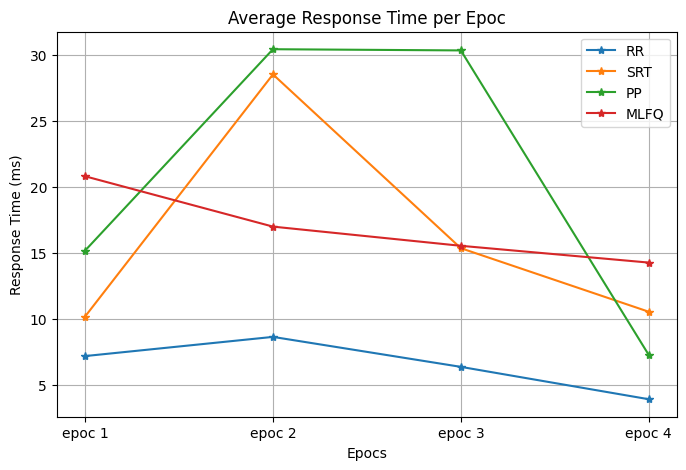

In [52]:
plot_metric(response_times, "Average Response Time per Epoc", "Response Time (ms)")



From the diagram above, it's more likely that Round Robin will have the least average response times across the epocs, followed by Multi-level Feedback Queue. Shortest Remaining Time had its average response times mostly lower than that of Preemptive Priority. Obviously, I can say much about what you (Grader) are seeing right now because it was randomized, I will predict that the algorithms in the order of increasing average response times is RR, MLFQ, PP, and SRT.  

Below is a visualization for average wait times among the algorithms

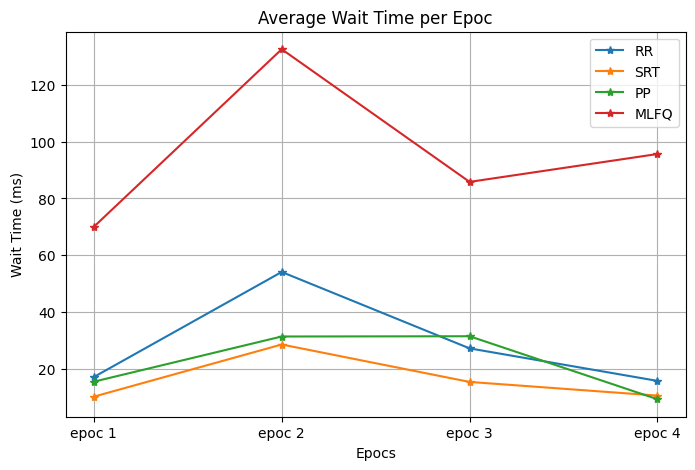

In [53]:
plot_metric(wait_times, "Average Wait Time per Epoc", "Wait Time (ms)")

Here, It should be clear that the algorithms in the order of increasing average wait times are SRT, PP, RR, and MLFQ.
I interpretate this findings as SRT is the optimal algorithm among these algorithms. Also, notice how inefficient MLFQ is compared to the rest of the algorithms, even though it had a competitive response time above. This makes MLFQ a suitable scheduler for interactive applications where users prefer frequent interactions between themselves and the applications.

Below is a visualization for average turnaround times 

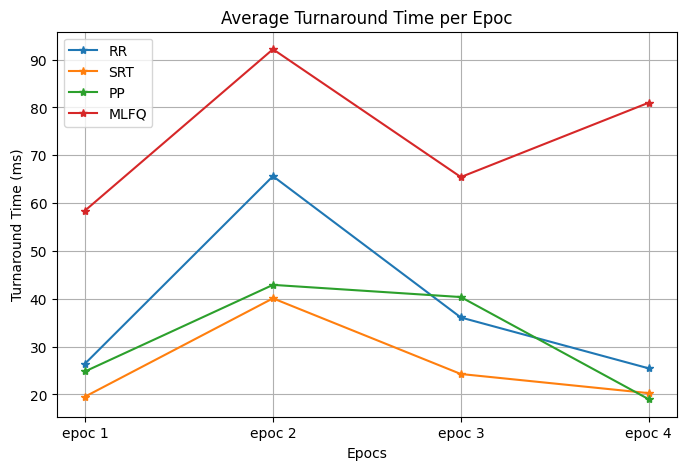

In [54]:
plot_metric(turnaround_times, "Average Turnaround Time per Epoc", "Turnaround Time (ms)")

The outcome from the average turnaround times aren't surprising. It's a corollary from the average wait times results. 

# References/Acknowledgements

Derrick Agyemang Duah

Professor Naser Al Madi

StackOverFlow